# Jyväskylän kaupungin ostot 2012-2021 <a name="header1"></a>
### Osa 2: Datan analysointi

## Johdanto <a name="introduction"></a>

Tässä tehtävässä tutkitaan Jyväskylän kaupungin ostolaskuja vuosilta 2012-2021. Aineistoa analysoidaan Pythonilla, ja sitä havainnollistetaan erilaisten visualisointien ja taulukoiden avulla. Tiedot on tuotu Excel-tiedostoista, jotka on ladattu 9.5.2023 Jyväskylän kaupungin avoimen datan palvelusta osoitteesta https://data.jyvaskyla.fi/data.php. Tämä muistio (*notebook*) on luotu JupyterLabilla. 

Aineisto on koostettu ja siivottu aiemmassa tiedostossa *'ostolaskut_aineisto.ipynb'*. Nyt on aika tutkia dataa tarkemmin ja katsoa, millaista tietoa siihen sisältyy. Vastauksia halutaan saada seuraaviin kysymyksiin:

* [Kuinka paljon ostoja eri vuosina on kirjattu kaikkiaan](#subparagraph5)
* [Mitkä ovat aineiston tilastolliset tunnusluvut](#subparagraph6) 
* [Mitkä ovat olleet suurimmat yksittäiset ostot](#subparagraph7)
* [Kuinka paljon ostoja kirjattiin eri vuosina vastuualueittain](#subparagraph8)
* [Millaisia ostoja sosiaali- ja terveyspalveluissa on tehty](#subparagraph9)  


Ensimmäiseksi tuodaan tarvittavat kirjastot, ja ladataan aineisto tiedostosta *'ostolaskut.csv'*:

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("ostolaskut.csv")

# Katsotaan aineiston viisi ensimmäistä riviä: 
df.head(5)

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1770.00
1,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1100.00
2,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,850.00
3,2021,Konsernihallinto,VALTERI-KOULU,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1215.56
4,2021,Konsernihallinto,VALTERI-KOULU,Ulkoiset palvelujen ostot,Asiantuntijapalvelut,1130.68


### Ostot vuosittain <a name="subparagraph5"></a> 

Tutkitaan, kuinka paljon Jyväskylän kaupungin kokonaisostot olivat vuositasolla. Python esittää suuret luvut oletusarvoisesti kymmenpotenssimuodossa, esimerkiksi '3.693571e+08', mikä ei tee lukujen vertailusta helppoa. Luettavuuden parantamiseksi ostot on seuraavassa muunnettu miljooniksi euroiksi.

In [9]:
# Kokonaisostot vuosittain (miljoonina euroina):
ostot = (df.groupby('Vuosi')['Nettosumma'].sum()/1000000)
ostot

Vuosi
2012    369.357095
2013    366.606739
2014    355.713543
2015    356.286764
2016    371.658563
2017    384.866733
2018    403.906205
2019    412.807964
2020    408.099289
2021    444.548729
Name: Nettosumma, dtype: float64

Vertailu on helpompaa, kun ostot visualisoidaan. Tehdään vuosiostoista pylväskaavio:

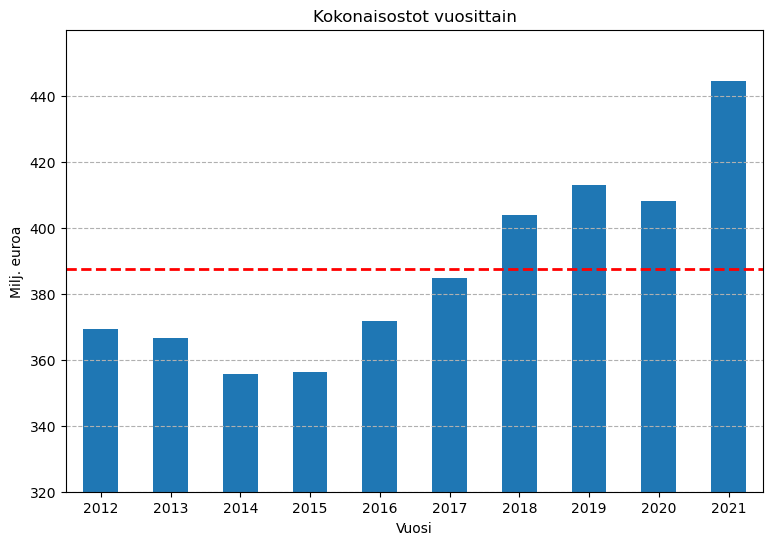

In [15]:
# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Kokonaisostot vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Milj. euroa')

# Asetetaan y-akselin alku- ja loppupiste ja sopivat asteikon välit:
plt.ylim(320, 460)
plt.yticks(np.arange(320, 460, 20))

# Luodaan halutun kokoinen pylväskaavio ostoista:
ostot.plot(kind = 'bar', figsize=(9, 6))

# Asetetaan ruudukko:
plt.grid(axis = 'y', linestyle = '--')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

# Asetetaan keskiarvoviiva:
plt.axhline(y=np.nanmean(ostot), color='red', linestyle='--', linewidth=2)

plt.show()

Kaaviosta havaitaan, että vuosittaiset ostot ovat olleet tarkastelujakson alkupäässä pienempiä kuin loppupäässä. Kuutena ensimmäisenä vuonna ostot ovat jääneet alle tarkastelujakson keskiarvon, kun taas neljänä viimeisenä vuotena ne ovat olleet keskiarvoa suurempia. Suurin poikkeama ostojen keskiarvoon on ollut vuonna 2021.   

### Kuvaileva tilastoanalyysi <a name="subparagraph6"></a> 

Tutkitaan seuraavaksi tilastollisten tunnuslukujen avulla, mitä euromääräisistä netto-ostoista saadaan selville *describe*-metodin avulla:

In [20]:
stats = df['Nettosumma'].describe()
stats

count    1.953887e+06
mean     1.982639e+03
std      7.722789e+04
min     -9.078436e+06
25%      2.211000e+01
50%      9.416000e+01
75%      3.864300e+02
max      1.386253e+07
Name: Nettosumma, dtype: float64

Yllä olevasta huomataan, että pienin osto on negatiivinen, mikä tarkoittaa, että aineistossa on mukana hyvityslaskuja. Jatketaan tarkastelua seuraavaksi vuositasolla ja vain varsinaisilla ostoilla, eli jätetään nämä "negatiiviset ostot" huomioimatta. Tehdään tätä varten uusi datakehikko *'df1'*:

In [100]:
# Tehdään dataframe 'df1', josta on puhdistettu hyvityslaskut pois:
df1 = df[df['Nettosumma'] > 0]
    
# Ryhmitellään nettosummat vuosittain, ja kootaan halutut tunnusluvut uuteen dataframeen 'tilastot':
tilastot = df1.groupby('Vuosi', as_index=False).agg(
    {'Nettosumma': ['count', 'sum', 'mean', 'std', 'min', 'max']
    })

# Vaihdetaan sarakkeiden nimet:
tilastot.columns = ['Vuosi', 'Ostojen lukumäärä', 'Ostot yhteensä (milj. euroa)', 'Keskimääräinen osto', 'Keskihajonta', 'Minimiosto', 'Maksimiosto (milj. euroa)']

# Muotoillaan sarakkeita luettavuuden parantamiseksi. Valitaan ensimmäiset muotoiltavat sarakkeet:
muot_sarakkeet1 = ['Ostot yhteensä (milj. euroa)', 'Maksimiosto (milj. euroa)']

# Muotoillaan näitä muuttamalla luvut miljooniksi euroiksi, ja pyöristämällä yhteen desimaaliin:
tilastot[muot_sarakkeet1] = tilastot[muot_sarakkeet1].applymap(lambda x: '{:.1f}'.format(x/1000000)).astype(float)

# Valitaan seuraavaksi muotoiltavat sarakkeet:
muot_sarakkeet2 = ['Keskimääräinen osto', 'Keskihajonta', 'Minimiosto']

# Muotoillaan näiden sarakkeiden luvut kahteen desimaaliin:
tilastot[muot_sarakkeet2] = tilastot[muot_sarakkeet2].applymap(lambda x: '{:.2f}'.format(x)).astype(float)

tilastot

#tilastot[['Vuosi', 'Keskimääräinen osto']].plot(x='Vuosi', kind='bar')

,Vuosi,Ostojen lukumäärä,Ostot yhteensä (milj. euroa),Keskimääräinen osto,Keskihajonta,Minimiosto,Maksimiosto (milj. euroa)
0,2012,203323,372.8,1833.64,46106.88,0.01,5.5
1,2013,205780,378.0,1836.99,53222.69,0.01,7.7
2,2014,192524,357.2,1855.50,52262.13,0.01,6.2
3,2015,198254,357.9,1805.50,53520.47,0.01,5.5
4,2016,211223,400.2,1894.71,61202.23,0.01,8.9
5,2017,211206,388.2,1838.07,63270.56,0.01,11.1
6,2018,224080,406.5,1814.08,68337.89,0.01,10.2
7,2019,137522,413.2,3004.74,126778.49,0.01,13.6
8,2020,125964,408.8,3245.26,131139.29,0.01,13.9
9,2021,219272,445.0,2029.51,100838.35,0.00,13.5


Tutkitaan ostoja vielä visuaalisesti. Katostaan, kuinka suuria keskimääräiset vuosiostot ovat olleet, ja kuinka paljon ostotapahtumia on tehty vuosittain:

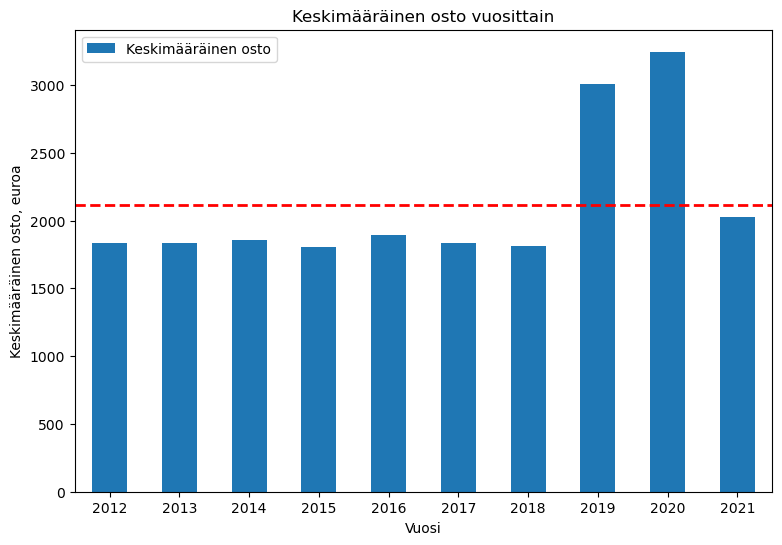

In [113]:
# Luodaan pylväskaavio:
tilastot.plot(kind = 'bar', x = 'Vuosi', y = 'Keskimääräinen osto', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Keskimääräinen osto vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Keskimääräinen osto, euroa')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

# Asetetaan keskiarvoviiva:
plt.axhline(y=np.nanmean(tilastot['Keskimääräinen osto']), color='red', linestyle='--', linewidth=2)

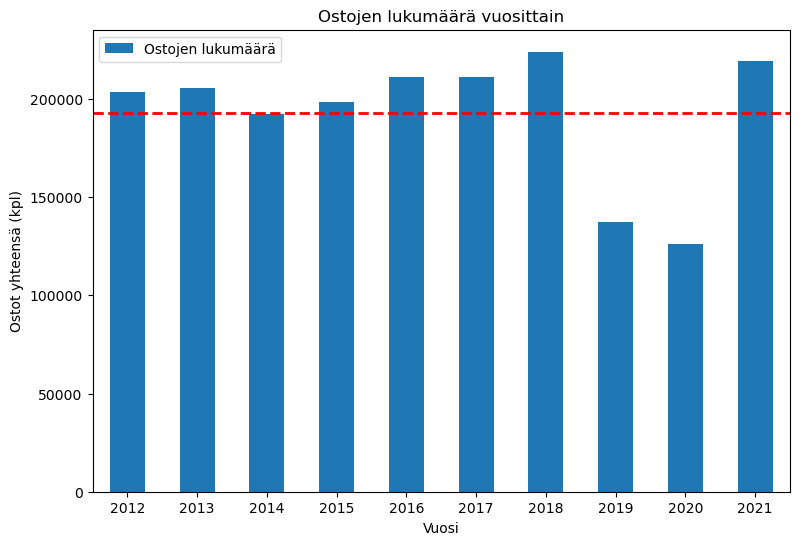

In [111]:
# Luodaan pylväskaavio:
tilastot.plot(kind = 'bar', x = 'Vuosi', y ='Ostojen lukumäärä', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Ostojen lukumäärä vuosittain')
plt.xlabel('Vuosi')
plt.ylabel('Ostot yhteensä (kpl)')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

# Asetetaan keskiarvoviiva:
plt.axhline(y=np.nanmean(tilastot['Ostojen lukumäärä']), color='red', linestyle='--', linewidth=2)

Tuloksista havaitaan, että keskimääräiset ostot ovat vaihdelleet vuosittain suuresti. Pienimmillään keskimääräiset vuosiostot olivat 1805,50 euroa (2015), ja suurimmillaan ne ovat olleet 3245,26 euroa (2020). Minimiostoissa sen sijaan ei ollut käytännössä eroa, vaan pienin ostos oli noin nolla euroa joka vuonna. Maksimiostoissa vaihtelu sen sijaan oli suurta. Pienimmillään yksittäinen maksimiosto oli vuosina 2012 ja 2015 (5,5 miljooonaa euroa), kun taas suurimmillaan maksimiosto oli vuonna 2020 (13,9 miljoonaa euroa). Ostojen yhteenlaskettu summa on ollut tarkastelujakson loppupuolella alkupuolta suurempi, kuten myös keskimääräiset ostot ja maksimiostot. 

Vuosittaisten ostotapahtumien määrä on pysynyt noin kahdensadan tuhannen kappaleen tasolla muulloin, paitsi vuosina 2019 ja 2020, jolloin ostoja on tehty merkittävästi muita vuosia vähemmän. Toisaalta, keskimääräinen osto on ollut vuosina 2019 ja 2020 merkittävästi muita vuosia korkeampi, eli näinä vuosina on ostettu vähemmän, mutta kalliimpia yksittäisiä ostoja. 

Keskihajonta kertoo, kuinka paljon havainnot poikkeavat keskiarvosta. Keskihajonta kasvaa tarkastelujakson kolmena viimeisenä vuotena reilusti, mikä antaa ymmärtää, että osa ostoista poikkeaa suuresti keskiarvo-ostoista. Tutkitaan tätä seuraavaksi lisää. Netto-ostojen jakaumaa voidaan kuvata visuaalisesti esimerkiksi laatikko-janakuviolla, joten tehdään seuraavaksi sellainen.

<AxesSubplot:title={'center':'Nettosumma'}, xlabel='Vuosi'>

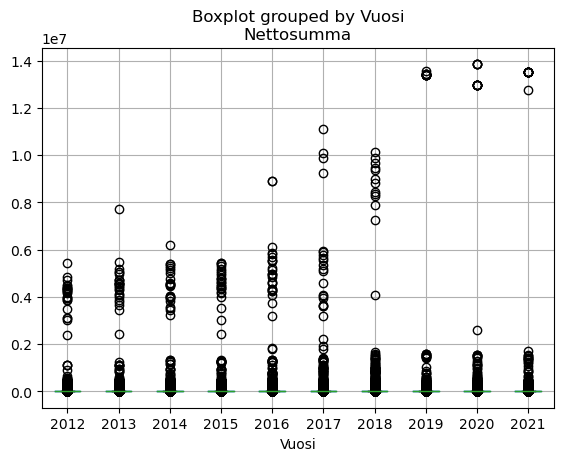

In [114]:
df1.boxplot(by = 'Vuosi', column = ['Nettosumma'])

Yllä oleva kuvio poikkeaa melkoisesti perinteisestä [laatikko-janakuvion (boxplot)](https://en.wikipedia.org/wiki/Box_plot) muodosta, mistä voidaan päätellä, että vuosittaiset ostot eivät ole tasaisesti jakautuneet. Kaavion laatikot sisältävät puolet vuoden ostoista, mutta tässä laatikoita ei edes erota, sillä ne näyttävät osuvan niin lähelle nollaa. Kuviosta kuitenkin havaitaan, että joka vuonna on ollut ostoja, jotka ovat varsin kaukana suurimmasta osasta ostoja. Erityisesti vuosina 2019, 2020 ja 2021 valtaosa ostoista on kasautunut melko nätisti lähelle toisiaan, mutta sitten jokunen suuri osto on todella kaukana näistä kaikista muista.   

Katsotaan seuraavaksi, mitkä ovat olleet suurimmat yksittäiset ostot.

### Suurimmat ostot <a name="subparagraph7"></a>   

Tutkitaan, mitkä ovat olleet kunkin vuoden viisi suurinta ostoa. 

In [42]:
# Tehdään uusi dataframe, johon ostot järjestetään laskevaan järjestykseen:
ostot_jarjest = df.sort_values(['Vuosi', 'Nettosumma'], ascending = [True, False])

# Ryhmitellään ostot vuosittain:
ostot_ryhmitelty = ostot_jarjest.groupby('Vuosi')

# Luodaan tyhjä dataframe 'isoimmat_ostot':
isoimmat_ostot = pd.DataFrame()

# Käydään läpi vuosiostoksia ryhminä (ryhma = ostokset vuoden aikana)
# Tallennetaan vuoden viisi suurinta ostoa ('isoimmat')
# Liitetään dataframeen 'isoimmat_ostot' kyseisen vuoden isoimmat ostot ('isoimmat'):

for vuosi, ryhma in ostot_ryhmitelty:
    isoimmat = ryhma.head(5)
    isoimmat_ostot = pd.concat([isoimmat_ostot, isoimmat])
    
# Muutetaan nettosummat miljooniksi euroiksi, pyöristetään kahden desimaalin tarkkuuteen:
isoimmat_ostot['Nettosumma'] = (isoimmat_ostot['Nettosumma'] / 1000000).round(2)

# Vaihdetaan sarakkeen 'Nettosumma' nimi:
isoimmat_ostot2 = isoimmat_ostot.rename(columns = {'Nettosumma': 'Nettosumma, milj. euroa'})

isoimmat_ostot2

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,"Nettosumma, milj. euroa"
106294,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.45
106270,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.86
105921,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.70
105989,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.51
105795,2012,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,4.48
105511,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,7.74
105812,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.47
105502,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.19
105433,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.08
105909,2013,Sosiaali- ja terveyspalvelut,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,5.06


Havainnoitetaan saatuja tuloksia visuaalisesti. Tehdään suurimmista vuosiostoista hajontakaavio.

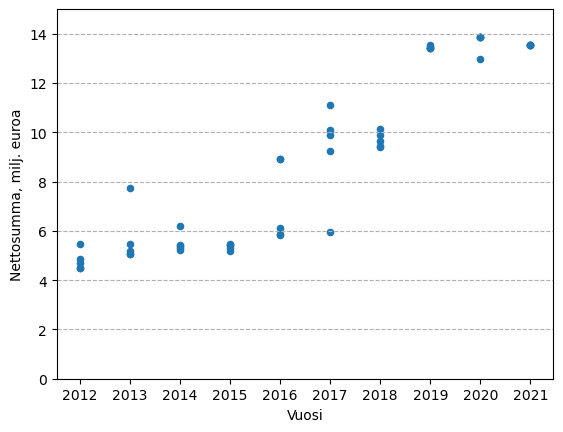

In [43]:
# Tehdään hajontakaavio:
isoimmat_ostot2.plot.scatter(x = 'Vuosi', y = 'Nettosumma, milj. euroa')

# Asetetaan y-akselin asteikko:
plt.ylim([0, 15])

# Lisätään viivat:
plt.grid(axis = 'y', linestyle = '--')

plt.show()

Tuloksista havaitaan, että suurimmat ostot joka vuonna on kirjattu sosiaali- ja terveyspalvelujen vastuualueelle, mutta näiden suuruus on vaihdellut reilusti vuosittain. Suurimmat yksittäiset ostot ovat olleet vuosina 2019, 2020 ja 2021, pienimmät taas vuosina 2012 ja 2015.    

Tutkitaan seuraavaksi tarkemmin, kuinka ostot jakaantuvat eri vastuualueiden kesken. 

### Ostot vastuualueittain <a name="subparagraph8"></a>  

In [44]:
# Lasketaan nettosummat yhteen vastuualueittain, ja muunnetaan miljooniksi euroiksi:  
ostot_va = pd.DataFrame(df.groupby('Vastuualue')['Nettosumma'].sum()/1000000)

# Lajitellaan tulokset laskevaan järjestykseen: 
ostot_va2 = (ostot_va.sort_values(by = 'Nettosumma', ascending = False))

# Vaihdetaan sarakkeen nimi: 
ostot_va2.columns = ['Kokonaisostot yhteensä, milj. euroa']

# Pyöristetään tulokset yhden desimaalin tarkkuuteen: 
ostot_va3 = ostot_va2.round(1)

# Tulostetaan saatu datakehikko:
ostot_va3

,"Kokonaisostot yhteensä, milj. euroa"
Vastuualue,
Sosiaali- ja terveyspalvelut,2176.1
Jyväskylän Tilapalvelu,571.5
Kaupunkirakennepalvelut,480.1
Konsernihallinto,162.2
Kasvun ja oppimisen palvelut,130.3
Kylän Kattaus,84.1
Altek Aluetekniikka,75.6
Liikuntapalvelut,63.7
K-S Pelastuslaitos,60.6


In [45]:
# Tehdään datakehikko 'df_vvv', jossa ostot ryhmitellään vuosien ja vastuualueitten mukaan (milj. euroa):
df_vvv = (df['Nettosumma'].groupby([df['Vuosi'], df['Vastuualue']]).sum())/1000000

# Tehdään uusi datakehikko 'df_vvvu', jossa 2-tasoinen indeksi muotoillaan riviksi ja sarakkeiksi:
df_vvvu = df_vvv.unstack()

# Kerätään aiemmasta datakehikosta 'va_3' vastuualueet listaan:
cols = ostot_va3.index

# Vaihdetaan vastuualuelistan avulla datakehikon 'df_vvu' sarakkeiden järjestystä:
df_vvvu = df_vvvu[cols]

df_vvvu

Vastuualue,Sosiaali- ja terveyspalvelut,Jyväskylän Tilapalvelu,Kaupunkirakennepalvelut,Konsernihallinto,Kasvun ja oppimisen palvelut,Kylän Kattaus,Altek Aluetekniikka,Liikuntapalvelut,K-S Pelastuslaitos,Kulttuuripalvelut,Työterveys Aalto,Talouskeskus,Perusturva,Kulttuuri- ja liikuntapalvelut,Konsernihallinto / Kankaan alue
Vuosi,,,,,,,,,,,,,,,
2012,195.257092,72.752650,37.292812,13.712814,13.422582,6.656425,9.864133,5.164644,6.504872,4.538122,2.021601,2.169346,NaN,NaN,NaN
2013,214.892883,50.767856,36.139738,13.965168,14.490285,6.217150,10.499184,6.317418,5.759586,3.826071,1.907027,1.824375,NaN,NaN,NaN
2014,218.340867,45.985525,37.569190,10.921145,11.135362,5.975258,8.208549,5.607276,5.137988,3.877346,1.679633,1.275404,NaN,NaN,NaN
2015,206.425180,43.963856,42.237236,17.603906,12.234088,6.116834,8.770043,5.635193,5.871499,4.380114,1.846249,1.202566,NaN,NaN,NaN
2016,212.922520,46.261979,47.647577,18.093412,10.361734,8.680994,8.533941,5.725863,5.771458,4.314069,2.122351,1.222664,NaN,NaN,NaN
2017,219.165470,53.958871,48.097085,15.401737,11.904256,8.914585,8.012135,6.515230,5.452838,4.249275,1.954162,1.241088,NaN,NaN,NaN
2018,216.079596,68.879309,51.379705,15.129169,12.824510,9.903418,9.763503,5.827697,6.165423,4.566475,1.734879,1.352060,NaN,NaN,0.300462
2019,218.280380,65.150000,50.752620,18.497821,16.474150,10.960836,11.889857,7.748127,6.757217,6.296958,NaN,NaN,NaN,NaN,NaN
2020,225.488722,59.786605,61.891632,17.856875,12.596141,10.708071,0.014696,7.800575,6.669298,4.435386,NaN,NaN,0.585787,0.265501,NaN


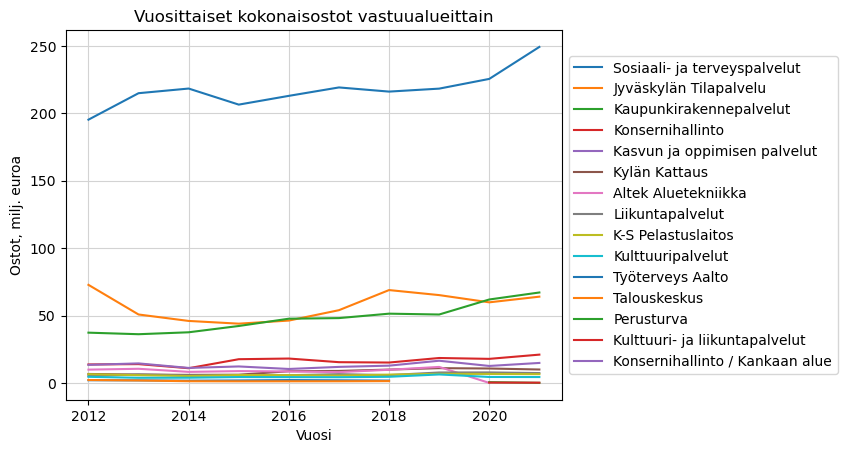

In [46]:
# Tehdään datakehikosta 'df_vvvu' kuvaaja:
df_vvvu.plot(title = 'Vuosittaiset kokonaisostot vastuualueittain')

#plt.xlim(2012, 2021, 1)

# Sijoitetaan selitelaatikko kuvion ulkopuolelle:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Lisätään akselien otsikot:
plt.ylabel('Ostot, milj. euroa')
plt.xlabel('Vuosi')

# Lisätään ruudukko: 
plt.grid(axis = 'both', color = "lightgray")
plt.show()

Taulukosta ja kuvaajasta havaitaan, että vuosittaisia kokonaisotoja on kirjattu reilusti kaikkein eniten sosiaali- ja terveyspalvelujen vastuualueelle, ja niiden vuosittaiset kokonaisostot ovat tarkastelujakson loppua kohden kasvaneet. Seuraavaksi eniten ostoja on kirjattu Jyväskylän Tilapalvelulle, jonka ostojen määrä on vaihdellut jonkin verran vuosittain. Kolmantena ostoissa on kaupunkirakennepalvelut, joiden ostojen määrä on kasvanut tarkastelujakson aikana selvästi. Muiden vastuualueiden ostot ovat olleet pienempiä, ja niiden vaihtelua on tästä kuvaajasta hankala tarkasti arvioida. **Jos niitä haluttaisiin tutkia lisää, kolme suurinta vastuualuetta kannattaisi poistaa tarkastelusta, jotta loppujen vaihtelua saataisiin tutkittua tarkemmin - HALUTAANKO?**   

### Sosiaali- ja terveyspalvelujen ostot <a name="subparagraph9"></a>   

Aiemmin havaittiin, että kaikkein suurimmat ostot kuuluvat sosiaali- ja terveyspalveluiden vastuualueelle. Tutkitaan seuraavaksi tarkemmin, millaisia ostoja sote-vastuualueelle on tarkastelujaksolla kirjattu. Ensimmäisenä katsotaan, minkä nimisille tiliryhmille ostoja on eri vuosina tehty.

**Mitä tiliryhmiä sotella?**   
**Mille tilille on kirjattu isoimmat ostot? Entä pienimmät?**   
**Ketkä ovat 10 suurinta toimittajaa?**


In [47]:
# Tehdään datakehikko 'sote' sosiaali- ja terveyspalveluje ostoista:
sote = df.loc[df['Vastuualue'] == 'Sosiaali- ja terveyspalvelut', ['Vuosi', 'Tiliryhmä', 'Tilin nimi', \
                                                                   'Toimittajan nimi', 'Nettosumma']]

# Ryhmitellään sote-palveluiden ostot vuosittain ja tiliryhmittäin:
sote1 = pd.DataFrame((sote['Nettosumma'].groupby([sote['Vuosi'], sote['Tiliryhmä']]).sum())/1000000).round(2)

# Tehdään uusi datakehikko 'sote_2':
sote_2 = sote1.unstack()

sote_2

Nettosumma                          \
Tiliryhmä Aineet, tarvikkeet ja tavarat Asiakaspalvelujen ostot   
Vuosi                                                             
2012                               0.02                     NaN   
2013                               0.02                     NaN   
2014                                NaN                     NaN   
2015                                NaN                     NaN   
2016                                NaN                     NaN   
2017                                NaN                     NaN   
2018                                NaN                     NaN   
2019                                NaN                     NaN   
2020                                NaN                  189.30   
2021                                NaN                  205.55   

                                                                             \
Tiliryhmä Henkilöstökorv. ja muut henk.menojen korj.erät Muut toimintakulut   
Vuosi                                                                         
2012                                                 NaN               0.00   
2013                                                 NaN               0.01   
2014                                                 NaN               0.01   
2015                                                 NaN               0.31   
2016                                                 NaN               0.18   
2017                                                 NaN               0.21   
2018                                                 NaN               0.36   
2019                                                 NaN               1.01   
2020                                                 NaN                NaN   
2021                                                 0.0                NaN   

                                                      \
Tiliryhmä Palvelujen ostot Sisäiset palvelujen ostot   
Vuosi                                                  
2012                   0.0                       NaN   
2013                   0.0                       NaN   
2014                   NaN                       NaN   
2015                   NaN                       NaN   
2016                   NaN                       NaN   
2017                   NaN                       NaN   
2018                   NaN                       NaN   
2019                   NaN                       NaN   
2020                   NaN                       NaN   
2021                   NaN                       0.0   

                                                                              \
Tiliryhmä Ulkoiset aineet, tarvikkeet ja tavarat Ulkoiset muut toimintakulut   
Vuosi                                                                          
2012                                        6.86                         NaN   
2013                                        6.46                         NaN   
2014                                        7.00                         NaN   
2015                                        6.79                         NaN   
2016                                        7.71                         NaN   
2017                                        7.61                         NaN   
2018                                        7.23                         NaN   
2019                                        7.67                         NaN   
2020                                        7.39                        0.08   
2021                                        8.97                        0.12   

                                                           \
Tiliryhmä Ulkoiset vuokrakulut Ulkoisten palvelujen ostot   
Vuosi                                                       
2012                       NaN                     186.27   
2013                       NaN                     207.24   
2014                       NaN                     209

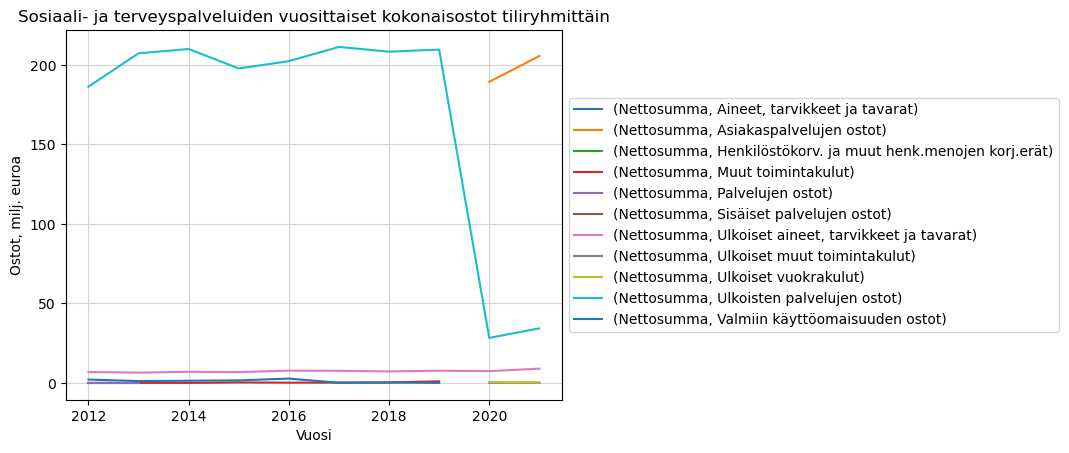

In [48]:
sote_2.plot(title = 'Sosiaali- ja terveyspalveluiden vuosittaiset kokonaisostot tiliryhmittäin')

# Sijoitetaan selitelaatikko kuvion ulkopuolelle:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Lisätään akselien otsikot:
plt.ylabel('Ostot, milj. euroa')
plt.xlabel('Vuosi')

# Lisätään ruudukko: 
plt.grid(axis = 'both', color = "lightgray")
plt.show()

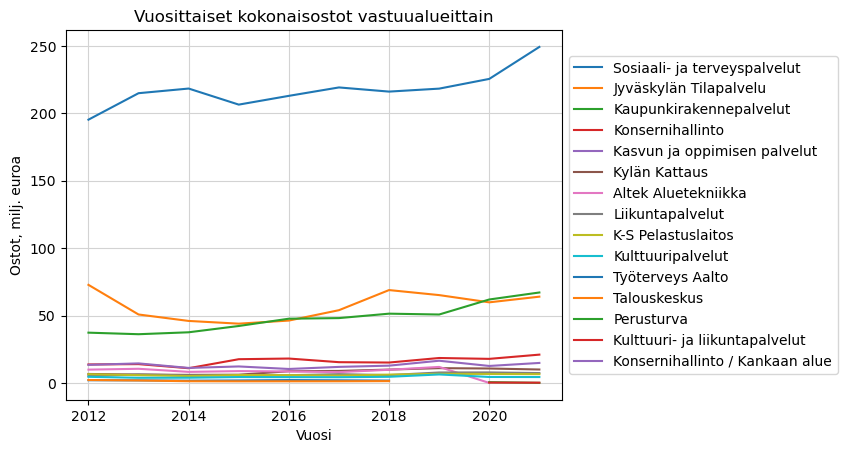

In [49]:
# Tehdään datakehikosta 'df_vvvu' kuvaaja:
df_vvvu.plot(title = 'Vuosittaiset kokonaisostot vastuualueittain')

#plt.xlim(2012, 2021, 1)

# Sijoitetaan selitelaatikko kuvion ulkopuolelle:
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Lisätään akselien otsikot:
plt.ylabel('Ostot, milj. euroa')
plt.xlabel('Vuosi')

# Lisätään ruudukko: 
plt.grid(axis = 'both', color = "lightgray")
plt.show()

In [50]:
# Sosiaali- ja terveyspalveluiden tiliryhmät: 
pd.unique(sote['Tiliryhmä'])

array(['Asiakaspalvelujen ostot', 'Ulkoisten palvelujen ostot',
       'Ulkoiset aineet, tarvikkeet ja tavarat', 'Ulkoiset vuokrakulut',
       'Ulkoiset muut toimintakulut',
       'Henkilöstökorv. ja muut henk.menojen korj.erät',
       'Sisäiset palvelujen ostot', 'Muut toimintakulut',
       'Valmiin käyttöomaisuuden ostot', 'Aineet, tarvikkeet ja tavarat',
       'Palvelujen ostot'], dtype=object)

In [51]:
# Ryhmitellään sote-palveluiden ostot vuosittain ja tiliryhmittäin:
sote1 = pd.DataFrame((sote['Nettosumma'].groupby([sote['Vuosi'], sote['Tiliryhmä']]).sum())/1000000)

sote2 = sote.sort_values(by = 'Nettosumma', ascending = False)

sote2

,Vuosi,Tiliryhmä,Tilin nimi,Toimittajan nimi,Nettosumma
28454,2020,Asiakaspalvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,13862534.47
28451,2020,Asiakaspalvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,13862534.47
28456,2020,Asiakaspalvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,13862534.47
28449,2020,Asiakaspalvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,13862534.47
54646,2019,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,13552664.31
...,...,...,...,...,...
169120,2016,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,-1783890.00
84972,2017,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,-1908616.00
169128,2016,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,-8922349.06
169122,2016,Ulkoisten palvelujen ostot,Asiakaspalvelujen ostot,KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,-8922349.06


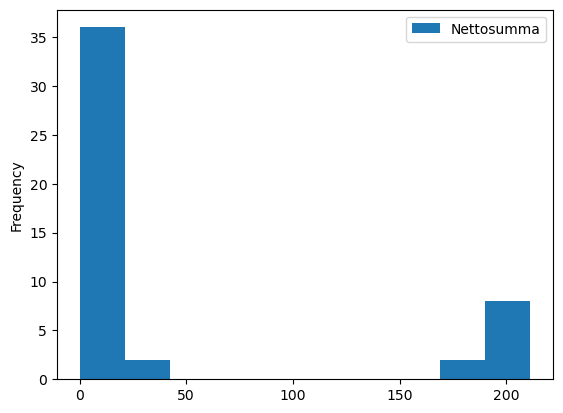

In [52]:
# Katsotaan, kuinka ostot 
sote1.plot(kind = 'hist')
plt.show()

<AxesSubplot:ylabel='Frequency'>

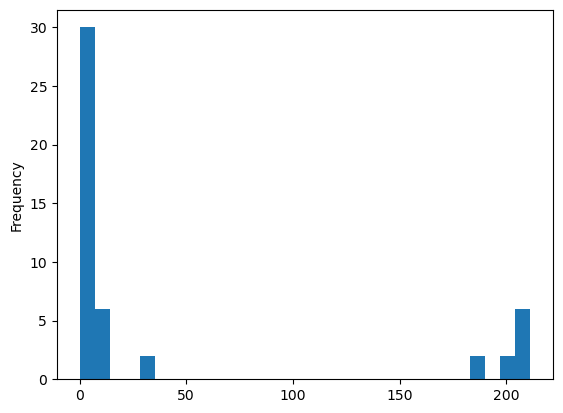

In [53]:
sote1.Nettosumma.plot.hist(bins=30)

In [54]:
# Lasketaan nettosummat yhteen vastuualueittain, ja muunnetaan miljooniksi euroiksi:  
df_vvv = (df['Nettosumma'].groupby([df['Vuosi'], df['Vastuualue']]).sum())/1000000

ostot_va = pd.DataFrame(df.groupby('Vastuualue')['Nettosumma'].sum()/1000000)

# Lajitellaan tulokset laskevaan järjestykseen: 
ostot_va2 = (ostot_va.sort_values(by = 'Nettosumma', ascending = False))

# Vaihdetaan sarakkeen nimi: 
ostot_va2.columns = ['Kokonaisostot yhteensä, milj. euroa']

# Pyöristetään tulokset yhden desimaalin tarkkuuteen: 
ostot_va3 = ostot_va2.round(1)

# Tulostetaan saatu datakehikko:
print(ostot_va3)

                                 Kokonaisostot yhteensä, milj. euroa
Vastuualue                                                          
Sosiaali- ja terveyspalvelut                                  2176.1
Jyväskylän Tilapalvelu                                         571.5
Kaupunkirakennepalvelut                                        480.1
Konsernihallinto                                               162.2
Kasvun ja oppimisen palvelut                                   130.3
Kylän Kattaus                                                   84.1
Altek Aluetekniikka                                             75.6
Liikuntapalvelut                                                63.7
K-S Pelastuslaitos                                              60.6
Kulttuuripalvelut                                               44.9
Työterveys Aalto                                                13.3
Talouskeskus                                                    10.3
Perusturva                        

In [55]:
# Ostot vastuualueittain, vuosi 2012:
ostot_12_va = df.groupby('Vastuualue')['Nettosumma'].sum()/1000000

# Muunnetaan 'series' -> 'dataframe':
ostot_12_va1 = ostot_12_va.to_frame()

# Järjestellään vastuualueet laskevaan järjestykseen ostojen määrän perusteella:
ostot_12_va2 = ostot_12_va1.sort_values(by = 'Nettosumma', ascending = False)

ostot_12_va2

,Nettosumma
Vastuualue,
Sosiaali- ja terveyspalvelut,2176.065842
Jyväskylän Tilapalvelu,571.493822
Kaupunkirakennepalvelut,480.093898
Konsernihallinto,162.181283
Kasvun ja oppimisen palvelut,130.276450
Kylän Kattaus,84.094848
Altek Aluetekniikka,75.556040
Liikuntapalvelut,63.662165
K-S Pelastuslaitos,60.615191


In [56]:
ostot_12_sort = ostot_12_va.sort_values(ascending = False).round(2)
ostot_12_sort

Vastuualue
Sosiaali- ja terveyspalvelut       2176.07
Jyväskylän Tilapalvelu              571.49
Kaupunkirakennepalvelut             480.09
Konsernihallinto                    162.18
Kasvun ja oppimisen palvelut        130.28
Kylän Kattaus                        84.09
Altek Aluetekniikka                  75.56
Liikuntapalvelut                     63.66
K-S Pelastuslaitos                   60.62
Kulttuuripalvelut                    44.86
Työterveys Aalto                     13.27
Talouskeskus                         10.29
Perusturva                            0.63
Kulttuuri- ja liikuntapalvelut        0.47
Konsernihallinto / Kankaan alue       0.30
Name: Nettosumma, dtype: float64

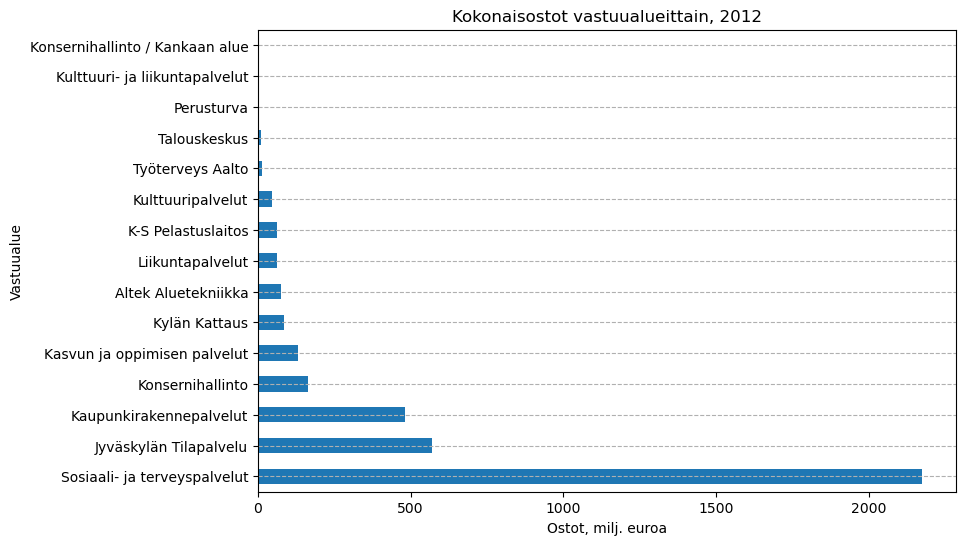

In [57]:
ostot_12_sort.plot(kind = 'barh', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Kokonaisostot vastuualueittain, 2012')
plt.xlabel('Ostot, milj. euroa')
plt.ylabel('Vastuualue')

# Asetetaan ruudukko:
plt.grid(axis = 'y', linestyle = '--')

# Asetetaan x-akselin vuosiluvut suoraan:
plt.xticks(rotation = 0)

plt.show()

### Suurimmat ja pienimmät toimittajat 

Selvitetään lopuksi, mitkä tahot ovat oolleet suurimpia ja pienimpiä ostojen toimittajia. Ensimmäisenä selvitetään, mitkä ovat olleet kymmenen suurinta toimittajaa nettosumman perusteella.

- Eniten ostettu vähintään viidelle eri toimialalle

In [58]:
# Ryhmitellään nettosummat toimittajien mukaan, ja muunnetaan summat miljooniksi euroiksi: 
toimittajat = pd.DataFrame(df.groupby('Toimittajan nimi')['Nettosumma'].sum()/1000000).round(2)

# Lajitellaan toimittajat laskevaan järjestykseen nettosumman perusteella:
toimittajat1 = pd.DataFrame(toimittajat.sort_values('Nettosumma', ascending = False))

# Katsotaan kymmenen suurinta toimittajaa:
toimittajat2 = pd.DataFrame(toimittajat1.head(10))

toimittajat2

,Nettosumma
Toimittajan nimi,
KESKI-SUOMEN SAIRAANHOITOPIIRIN KY,1682.87
JYVÄSKYLÄN LIIKENNE OY,125.38
TOTAL KIINTEISTÖPALVELUT OY,48.94
JYVÄSKYLÄN ENERGIA OY,46.63
ISS PALVELUT OY,40.53
RAKENNUSLIIKE PEKKA HÄMÄLÄINEN,35.02
FIMLAB LABORATORIOT OY,31.53
DESTIA OY,28.78
ARE OY,28.63


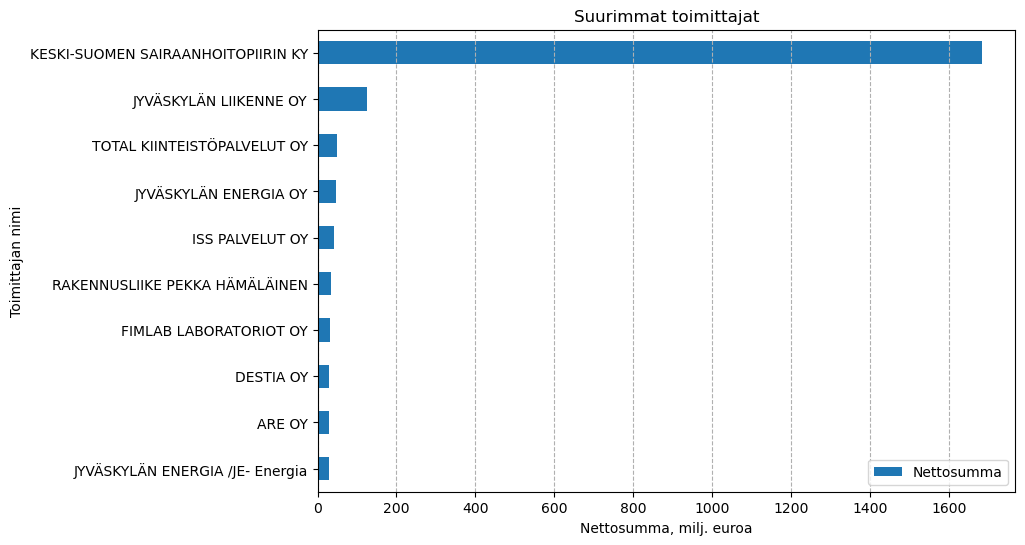

In [59]:
# Luodaan pylväskaavio vaakatasossa:
toimittajat2.sort_values(by = 'Nettosumma').plot(kind = 'barh', figsize=(9, 6))

# Asetetaan kaavion pääotsikko ja selitteet akseleille:
plt.title('Suurimmat toimittajat')
plt.xlabel('Nettosumma, milj. euroa')

# Asetetaan ruudukko:
plt.grid(axis = 'x', linestyle = '--')

plt.show()

Tuloksista huomataan, että valtaosan Jyväskylän kaupungin ostoista on toimittanut Keski-Suomen sairaanhoitopiirin Ky (yhteensä liki 1,7 miljardia euroa). Seuraavaksi suurimmat toimittajat ovat olleet Jyväskylän Liikenne Oy (125 miljoonaa euroa), Total Kiinteistöpalvelut Oy (49 miljoonaa euroa) sekä Jyväskyän Energia Oy (47 miljoonaa euroa).   

Tutkitaan seuvaavaksi, ketkä ovat toimittaneet Jyväskylän kaupungin pienimmät ostot. Käytetään tässä [kuvailevaa tilastoanalyysiä](#subparagraph6) varten luotua datakehikkoa *'df1'*, josta oli siivottu hyvityslaskut pois. Tässä siis huomioidaan vain yli nollan euron maksaneet ostot. Tutkitaan samalla, mille vastuualueelle ja tiliryhmälle kysyinen osto on tehty.

In [60]:
# Ryhmitellään nettosummat toimittajien mukaan: 
pientoimittajat = pd.DataFrame(df1.groupby('Toimittajan nimi')['Nettosumma'].sum()).round(2)

# Lajitellaan toimittajat nousevaan järjestykseen nettosumman perusteella:
pientoimittajat1 = pd.DataFrame(pientoimittajat.sort_values('Nettosumma', ascending = True))

# Katsotaan kymmenen pienintä toimittajaa:
pientoimittajat2 = pd.DataFrame(pientoimittajat1.head(10))

pientoimittajat2

,Nettosumma
Toimittajan nimi,
SKY GROUP FINLAND OY,0.01
Klarna * Jollyroom AB +46812012010,0.02
FACEBK *YEKK3D6TS2 650 543 7818,0.25
JYVASKYLAN KOULUTUSK Y JYVASKYLA,0.70
FACEBK *JBJHWLA4R2 fb me ads,0.80
CFI*JYVAESKYLAEN KATUL JYVAESKYLAE,0.81
HAMEENLINNAN KAUPUNKI HAMEENLINNA,0.81
CANVA COM 8778877815,0.89
MUSEOVIRASTO HELSINKI,0.91


Jos suurimmalle toimittajalle oli kirjattu yhteensä liki kahden miljardin euron ostot, pienimmillä toimittajilla ostot ovat olleet alle yhden euron luokkaa. Nämä ovat kuitenkin todennäköisesti olleet pieniä, yksittäisiä ostoja. Tutkitaan seuraavaksi, mitkä ovat pienimmät kymmenen toimittajaa, joilta on ostettu vähintään viisi kertaa, ja mille vastuualueille kyseiset ostot on kirjattu.

In [61]:
seller_summary = purchases_df.groupby('Seller').agg({'Price': 'sum', 'Department': 'count'})


NameError: name 'purchases_df' is not defined

In [ ]:
# Group the original dataframe by 'Seller' and 'Department', and aggregate the sum of prices
grouped_df = purchases_df.groupby(['Seller', 'Department']).agg({'Price': 'sum'})

# Reset the index to convert the grouped results into columns
grouped_df = grouped_df.reset_index()

# Merge the filtered sellers with the grouped dataframe to get the desired information
result_df = pd.merge(top_10_sellers, grouped_df, on='Seller')

# Sort the result dataframe by the total sum of prices in ascending order
result_df = result_df.sort_values('Price', ascending=True)

# Print the result dataframe
print(result_df)


In [ ]:
# Katsotaan, kuinka monta ostoa kullekin toimittajalle on kirjattu:
ostot = pd.DataFrame(df.groupby('Toimittajan nimi')['Nettosumma'].count())

# Suodatetaan mukaan toimittajat, joille on kirjattu vähintään viisi ostoa:
ostot1 = ostot[ (ostot['Nettosumma'] >= 5) ]
                
# Lajitellaan toimittajat nousevaan järjestykseen:
ostot2 = ostot1.sort_values(by = 'Nettosumma', ascending = True)
ostot2.head(20)

In [ ]:
# Valitaan toimittajat, joilta on ostettu vähintään viisi kertaa:
toimittajat4 = df[ (df['Toimittajan nimi'])['Toimittajan nimi', 'Vastuualue', 'Nettosumma']]

#df[['Toimittajan nimi', 'Vastuualue', 'Nettosumma']]

# Suodatetaan mukaan toimittajat, 


#df[df['Jyp']<4]['Jyp']
#df1 = df[ (df["maakunta"] == "Keski-Suomi") & (df["kokonaispinta-ala"] > 1000) ]


toimittajat4.head(10)



### Korrelaatiot   

Tutkitaan korrelaatiot vaikka kahden eri tiliryhmän ostojen välillä 

In [73]:
df.head()

,Vuosi,Vastuualue,Toimittajan nimi,Tiliryhmä,Tilin nimi,Nettosumma
0,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1770.00
1,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1100.00
2,2021,Konsernihallinto,KEPIT SYSTEMS OY,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,850.00
3,2021,Konsernihallinto,VALTERI-KOULU,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1215.56
4,2021,Konsernihallinto,VALTERI-KOULU,Ulkoisten palvelujen ostot,Asiantuntijapalvelut,1130.68


/Users/salla/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 179.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
/Users/salla/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 179.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/salla/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 179.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])


array([[<AxesSubplot:xlabel='Kuntanumero', ylabel='Kuntanumero'>,
        <AxesSubplot:xlabel='Tulosyksikkö', ylabel='Kuntanumero'>,
        <AxesSubplot:xlabel='Tili', ylabel='Kuntanumero'>,
        <AxesSubplot:xlabel='JHS-tili', ylabel='Kuntanumero'>,
        <AxesSubplot:xlabel='Laskun summa ilman ALV', ylabel='Kuntanumero'>],
       [<AxesSubplot:xlabel='Kuntanumero', ylabel='Tulosyksikkö'>,
        <AxesSubplot:xlabel='Tulosyksikkö', ylabel='Tulosyksikkö'>,
        <AxesSubplot:xlabel='Tili', ylabel='Tulosyksikkö'>,
        <AxesSubplot:xlabel='JHS-tili', ylabel='Tulosyksikkö'>,
        <AxesSubplot:xlabel='Laskun summa ilman ALV', ylabel='Tulosyksikkö'>],
       [<AxesSubplot:xlabel='Kuntanumero', ylabel='Tili'>,
        <AxesSubplot:xlabel='Tulosyksikkö', ylabel='Tili'>,
        <AxesSubplot:xlabel='Tili', ylabel='Tili'>,
        <AxesSubplot:xlabel='JHS-tili', ylabel='Tili'>,
        <AxesSubplot:xlabel='Laskun summa ilman ALV', ylabel='Tili'>],
       [<AxesSubplot:xlabel='Ku

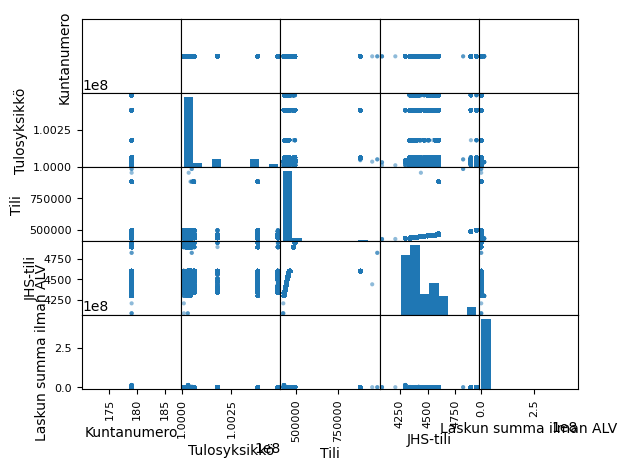

In [74]:
# Testi! 
pd.plotting.scatter_matrix(df_21)

In [75]:
df_21.corr()

,Kuntanumero,Tulosyksikkö,Tili,JHS-tili,Laskun summa ilman ALV
Kuntanumero,NaN,NaN,NaN,NaN,NaN
Tulosyksikkö,NaN,1.000000,0.002792,0.102344,-0.003264
Tili,NaN,0.002792,1.000000,0.373368,-0.002349
JHS-tili,NaN,0.102344,0.373368,1.000000,-0.011667
Laskun summa ilman ALV,NaN,-0.003264,-0.002349,-0.011667,1.000000


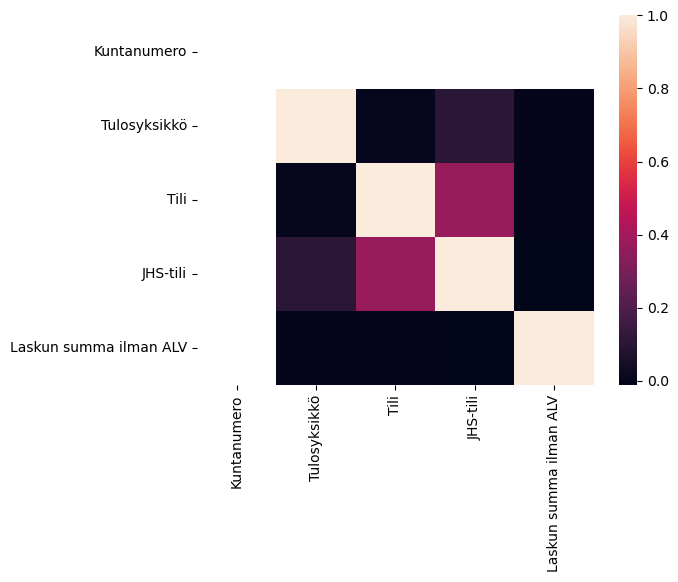

In [76]:
ax = sns.heatmap(df_21.corr())